In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise import evaluate, print_perf
from surprise import accuracy
import seaborn as sns
import numpy as np

In [2]:
train_data=pd.read_csv('ratings/train_data.tsv',sep='\t', names=['user_id','item_id','rating','timestamp'])
cv_data=pd.read_csv('ratings/validate_data.tsv',sep='\t', names=['user_id','item_id','rating','timestamp'])
test_data=pd.read_csv('ratings/test_data.tsv',sep='\t', names=['user_id','item_id','rating','timestamp'])

In [3]:
train_data.head(5)

,user_id,item_id,rating,timestamp
0,324347,102698,3.0,1.460851e+09
1,40843,152761,5.0,1.370131e+09
2,280314,32868,2.0,1.383610e+09
3,2337,133735,3.0,1.326326e+09
4,77888,481,5.0,1.155254e+09


In [4]:
cv_data.head(5)

,user_id,item_id,rating,timestamp
0,5841,14904,2.0,1.320624e+09
1,89635,61515,4.0,1.359590e+09
2,6808,119019,3.0,1.455149e+09
3,76565,154961,2.0,1.369354e+09
4,196604,87052,5.0,1.451261e+09


In [5]:
test_data.head(5)

,user_id,item_id,rating,timestamp
0,234658,122052,5.0,1.422749e+09
1,61686,71633,5.0,1.269216e+09
2,32674,122540,2.0,1.459814e+09
3,1149153,116623,4.0,1.383091e+09
4,735347,14508,4.0,1.368058e+09


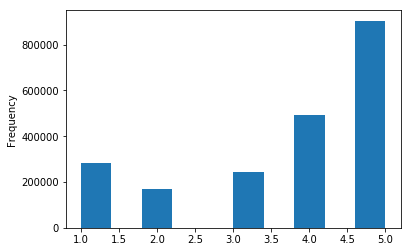

In [6]:
train_data.rating.plot.hist()

In [7]:
train_data.describe()

,user_id,item_id,rating,timestamp
count,2.096549e+06,2.096549e+06,2.096549e+06,2.096549e+06
mean,3.060499e+05,8.701379e+04,3.747902e+00,1.417164e+09
std,3.141209e+05,4.300518e+04,1.422042e+00,6.808921e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,1.090454e+09
25%,5.082000e+04,5.238900e+04,3.000000e+00,1.379894e+09
50%,1.834100e+05,9.043200e+04,4.000000e+00,1.434758e+09
75%,4.848740e+05,1.233590e+05,5.000000e+00,1.470010e+09
max,1.183361e+06,1.566390e+05,5.000000e+00,1.501027e+09


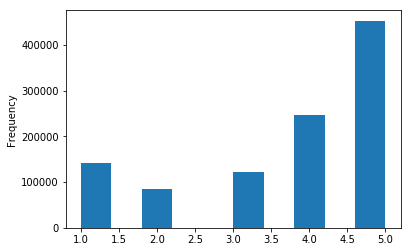

In [8]:
cv_data.rating.plot.hist()

In [9]:
cv_data.describe()

,user_id,item_id,rating,timestamp
count,1.048274e+06,1.048274e+06,1.048274e+06,1.048274e+06
mean,3.061558e+05,8.696332e+04,3.747595e+00,1.417144e+09
std,3.140440e+05,4.301025e+04,1.423025e+00,6.809791e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,1.103414e+09
25%,5.086000e+04,5.233400e+04,3.000000e+00,1.379894e+09
50%,1.837180e+05,9.027200e+04,4.000000e+00,1.434758e+09
75%,4.853158e+05,1.233380e+05,5.000000e+00,1.470010e+09
max,1.183357e+06,1.566390e+05,5.000000e+00,1.501027e+09


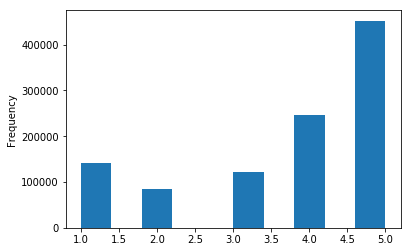

In [10]:
test_data.rating.plot.hist()

In [11]:
test_data.describe()

,user_id,item_id,rating,timestamp
count,1.048275e+06,1.048275e+06,1.048275e+06,1.048275e+06
mean,3.060941e+05,8.700101e+04,3.747449e+00,1.417008e+09
std,3.139905e+05,4.299573e+04,1.422625e+00,6.811040e+07
min,1.000000e+00,2.000000e+00,1.000000e+00,1.098144e+09
25%,5.083450e+04,5.236300e+04,3.000000e+00,1.379635e+09
50%,1.841190e+05,9.036300e+04,4.000000e+00,1.434499e+09
75%,4.846795e+05,1.233860e+05,5.000000e+00,1.469837e+09
max,1.183362e+06,1.566390e+05,5.000000e+00,1.501027e+09


In [12]:
print("Train size: "+str(train_data.shape))
print("CV size: "+str(cv_data.shape))
print("Test size: "+str(cv_data.shape))

Train size: (2096549, 4)
CV size: (1048274, 4)
Test size: (1048274, 4)


In [13]:
reader = Reader(rating_scale=(1, 5))
data_train = Dataset.load_from_df(train_data[['user_id', 'item_id', 'rating']], reader)
data_cv= Dataset.load_from_df(cv_data[['user_id', 'item_id', 'rating']], reader)
data_test= Dataset.load_from_df(test_data[['user_id', 'item_id', 'rating']], reader)

In [14]:
#Data Train Set
data_train=data_train.build_full_trainset()
data_cv=data_cv.build_full_trainset()
data_test=data_test.build_full_trainset()
#Data Test Set
data_train_trainset=data_train.build_testset()
data_cv=data_cv.build_testset()
data_test=data_test.build_testset()

In [15]:
mean=data_train.global_mean
print(mean)

3.74790190928


In [17]:
trainErr = []
cvErr = []
testErr = []
for k in range(1, 50):
    print('Factores= ')
    print(k)
    algo=SVD(n_factors=k, n_epochs=100, biased=True, lr_all=0.005, reg_all=0, init_mean=0, init_std_dev=0.01,verbose=False)
    algo.train(data_train)
    predictions = algo.test(data_train_trainset)
    predictions_cv=algo.test(data_cv)
    predictions_test=algo.test(data_test)
    trainErr.append(accuracy.rmse(predictions, verbose=True))
    cvErr.append(accuracy.rmse(predictions_cv, verbose=True))
    testErr.append(accuracy.rmse(predictions_test, verbose=True))

Factores= 
1
RMSE: 0.8597
RMSE: 1.2991
RMSE: 1.2975
Factores= 
2
RMSE: 0.8084
RMSE: 1.3090
RMSE: 1.3078
Factores= 
3
RMSE: 0.7695
RMSE: 1.3149
RMSE: 1.3142
Factores= 
4
RMSE: 0.7391
RMSE: 1.3190
RMSE: 1.3178
Factores= 
5
RMSE: 0.7128
RMSE: 1.3208
RMSE: 1.3188
Factores= 
6
RMSE: 0.6921
RMSE: 1.3220
RMSE: 1.3207
Factores= 
7
RMSE: 0.6728
RMSE: 1.3238
RMSE: 1.3216
Factores= 
8
RMSE: 0.6551
RMSE: 1.3235
RMSE: 1.3207
Factores= 
9
RMSE: 0.6409
RMSE: 1.3231
RMSE: 1.3218
Factores= 
10
RMSE: 0.6275
RMSE: 1.3236
RMSE: 1.3221
Factores= 
11
RMSE: 0.6159
RMSE: 1.3234
RMSE: 1.3211
Factores= 
12
RMSE: 0.6048
RMSE: 1.3223
RMSE: 1.3211
Factores= 
13
RMSE: 0.5948
RMSE: 1.3220
RMSE: 1.3199
Factores= 
14
RMSE: 0.5865
RMSE: 1.3215
RMSE: 1.3194
Factores= 
15
RMSE: 0.5783
RMSE: 1.3216
RMSE: 1.3187
Factores= 
16
RMSE: 0.5705
RMSE: 1.3198
RMSE: 1.3182
Factores= 
17
RMSE: 0.5632
RMSE: 1.3195
RMSE: 1.3179
Factores= 
18
RMSE: 0.5564
RMSE: 1.3182
RMSE: 1.3170
Factores= 
19
RMSE: 0.5500
RMSE: 1.3188
RMSE: 1.3167
Fa

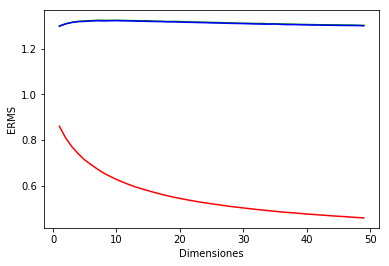

In [18]:
trplot = plt.plot(range(1,50), trainErr, 'r')
cvplot = plt.plot(range(1,50), cvErr, 'g')
testplot = plt.plot(range(1,50), testErr, 'b')
plt.ylabel('ERMS')
plt.xlabel('Dimensiones')
#plt.legend([trplot, cvplot, testplot], ['Training', 'cv', 'test'])
plt.show()

In [21]:
trainErr = []
cvErr = []
testErr = []
epocas = [50,100,150,200,250,300]
for r in epocas:
    print('Epocas')
    print(r)
    algo=SVD(n_factors=1, n_epochs=r, biased=True, lr_all=0.005, reg_all=0, init_mean=0, init_std_dev=0.01,verbose=False)
    algo.train(data_train)
    predictions = algo.test(data_train_trainset)
    predictions_cv=algo.test(data_cv)
    predictions_test=algo.test(data_test)
    trainErr.append(accuracy.rmse(predictions, verbose=True))
    cvErr.append(accuracy.rmse(predictions_cv, verbose=True))
    testErr.append(accuracy.rmse(predictions_test, verbose=True))

Epocas
50
RMSE: 1.0001
RMSE: 1.2666
RMSE: 1.2647
Epocas
100
RMSE: 0.8601
RMSE: 1.2996
RMSE: 1.2977
Epocas
150
RMSE: 0.7778
RMSE: 1.3293
RMSE: 1.3285
Epocas
200
RMSE: 0.7303
RMSE: 1.3517
RMSE: 1.3492
Epocas
250
RMSE: 0.7019
RMSE: 1.3669
RMSE: 1.3659
Epocas
300
RMSE: 0.6851
RMSE: 1.3781
RMSE: 1.3763


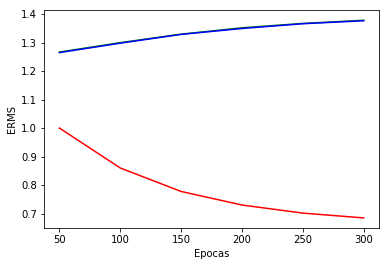

In [22]:
trplot = plt.plot(epocas, trainErr, 'r')
cvplot = plt.plot(epocas, cvErr, 'g')
testplot = plt.plot(epocas, testErr, 'b')
plt.ylabel('ERMS')
plt.xlabel('Epocas')
#plt.legend([trplot, cvplot, testplot], ['Training', 'cv', 'test'])
plt.show()

In [26]:
trainErr = []
cvErr = []
testErr = []
training = [0.0001,0.001,0.003,0.005,0.007,0.01,0.05,0.1]
for r in training:
    print('Training')
    print(r)
    algo=SVD(n_factors=1, n_epochs=50, biased=True, lr_all=r, reg_all=0, init_mean=0, init_std_dev=0.01,verbose=False)
    algo.train(data_train)
    predictions = algo.test(data_train_trainset)
    predictions_cv=algo.test(data_cv)
    predictions_test=algo.test(data_test)
    trainErr.append(accuracy.rmse(predictions, verbose=True))
    cvErr.append(accuracy.rmse(predictions_cv, verbose=True))
    testErr.append(accuracy.rmse(predictions_test, verbose=True))

Training
0.0001
RMSE: 1.3473
RMSE: 1.3609
RMSE: 1.3600
Training
0.001
RMSE: 1.1968
RMSE: 1.2802
RMSE: 1.2786
Training
0.003
RMSE: 1.0782
RMSE: 1.2609
RMSE: 1.2592
Training
0.005
RMSE: 1.0011
RMSE: 1.2661
RMSE: 1.2646
Training
0.007
RMSE: 0.9379
RMSE: 1.2781
RMSE: 1.2759
Training
0.01
RMSE: 0.8607
RMSE: 1.2989
RMSE: 1.2972
Training
0.05
RMSE: 0.6694
RMSE: 1.4067
RMSE: 1.4055
Training
0.1
RMSE: 0.6980
RMSE: 1.4487
RMSE: 1.4465


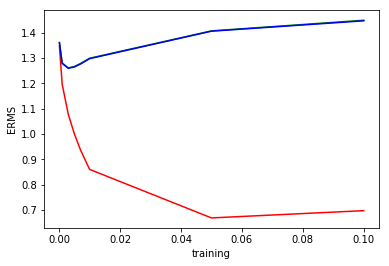

In [27]:
trplot = plt.plot(training, trainErr, 'r')
cvplot = plt.plot(training, cvErr, 'g')
testplot = plt.plot(training, testErr, 'b')
plt.ylabel('ERMS')
plt.xlabel('training')
#plt.legend([trplot, cvplot, testplot], ['Training', 'cv', 'test'])
plt.show()

In [28]:
trainErr = []
cvErr = []
testErr = []
regularizacion = [0.001,0.1,0.5,1,10]
for r in regularizacion:
    print('regularizacion')
    print(r)
    algo=SVD(n_factors=1, n_epochs=50, biased=True, lr_all=0.003, reg_all=r, init_mean=0, init_std_dev=0.01,verbose=False)
    algo.train(data_train)
    predictions = algo.test(data_train_trainset)
    predictions_cv=algo.test(data_cv)
    predictions_test=algo.test(data_test)
    trainErr.append(accuracy.rmse(predictions, verbose=True))
    cvErr.append(accuracy.rmse(predictions_cv, verbose=True))
    testErr.append(accuracy.rmse(predictions_test, verbose=True))

regularizacion
0.001
RMSE: 1.0798
RMSE: 1.2609
RMSE: 1.2591
regularizacion
0.1
RMSE: 1.0907
RMSE: 1.2604
RMSE: 1.2588
regularizacion
0.5
RMSE: 1.1179
RMSE: 1.2720
RMSE: 1.2706
regularizacion
1
RMSE: 1.1516
RMSE: 1.2905
RMSE: 1.2893
regularizacion
10
RMSE: 1.3305
RMSE: 1.3849
RMSE: 1.3842


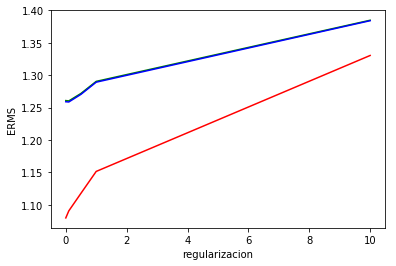

In [29]:
trplot = plt.plot(regularizacion, trainErr, 'r')
cvplot = plt.plot(regularizacion, cvErr, 'g')
testplot = plt.plot(regularizacion, testErr, 'b')
plt.ylabel('ERMS')
plt.xlabel('regularizacion')
#plt.legend([trplot, cvplot, testplot], ['Training', 'cv', 'test'])
plt.show()